# Random Forest

In [1]:
#!pip install imblearn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import RandomOverSampler, SMOTE

from src import ensemble_utils

## UDF

## Import Data

In [18]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
for idx, feature in enumerate(accidents.columns):
    print('{}. {}'.format(idx, feature))

0. RD_NO
1. CRASH_DATE
2. POSTED_SPEED_LIMIT
3. TRAFFIC_CONTROL_DEVICE
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. LIGHTING_CONDITION
7. FIRST_CRASH_TYPE
8. TRAFFICWAY_TYPE
9. LANE_CNT
10. ALIGNMENT
11. ROADWAY_SURFACE_COND
12. ROAD_DEFECT
13. CRASH_TYPE
14. INTERSECTION_RELATED_I
15. NOT_RIGHT_OF_WAY_I
16. HIT_AND_RUN_I
17. PRIM_CONTRIBUTORY_CAUSE
18. SEC_CONTRIBUTORY_CAUSE
19. STREET_NO
20. STREET_DIRECTION
21. STREET_NAME
22. BEAT_OF_OCCURRENCE
23. WORK_ZONE_I
24. WORK_ZONE_TYPE
25. WORKERS_PRESENT_I
26. INJURIES_UNKNOWN
27. CRASH_HOUR
28. CRASH_DAY_OF_WEEK
29. CRASH_MONTH
30. LATITUDE
31. LONGITUDE
32. LOCATION
33. crash_date
34. crash_year
35. crash_month
36. is_fatal_or_incap
37. time_of_day
38. is_weekend
39. season
40. is_cyclist
41. is_pedestrian
42. is_head_on
43. is_parked
44. is_using_cellphone
45. has_disregarded_traffic_devices
46. is_failed_to_yield_right_of_way
47. is_reckless_driving
48. is_sleet_snow
49. is_rain
50. is_clear_weather
51. has_snow_ice
52. is_dark_no_lig

## Select Features and Process Data 

In [19]:
indices = [2, 38, 40, 41, 42, 43, 48, 50, 53, 56, 57, 60, 64, 65]
selected_features = list(accidents.columns[indices])

X = accidents[selected_features]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [20]:
oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.75, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Hyperparameter Tuning

In [21]:
n_features = X.shape[1]

n_estimators = [10, 50, 100]
max_features = [2, int(np.sqrt(n_features)), n_features // 2, n_features]
max_depth = [1, 2, 3]
params_grid = dict(n_estimators=n_estimators,
                   max_features=max_features,
                   max_depth=max_depth)

In [ ]:
rf = RandomForestClassifier(random_state=3)

clf = GridSearchCV(rf, params_grid, cv=5, verbose=0, scoring='recall')

best_model = clf.fit(X_over, y_over)

In [ ]:
print('Optimal # of Estimators: ', best_model.best_estimator_.get_params()['n_estimators'])
print('Optimal # of Features per Node: ', best_model.best_estimator_.get_params()['max_features'])
print('Max. Depth of Tree: ', best_model.best_estimator_.get_params()['max_depth'])

### Train and Predict

In [ ]:
n_estimators = 50
max_features = 5
max_depth = 3

rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=3)
rf.fit(X_over, y_over)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\n')
print('Recall (Scores FN): ', round(recall_score(y_test, y_pred), 4))
print('Precision (Scores FP): ', round(precision_score(y_test, y_pred), 4))
print('AUC Score: ', round(roc_auc_score(y_test, y_prob), 4))

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 20, 'fontweight':'bold'}, fmt='d',
                 xticklabels=False, yticklabels=False);
#plt.savefig('img/cf_matrix.png', bbox_inches='tight')

### Permutation Importance

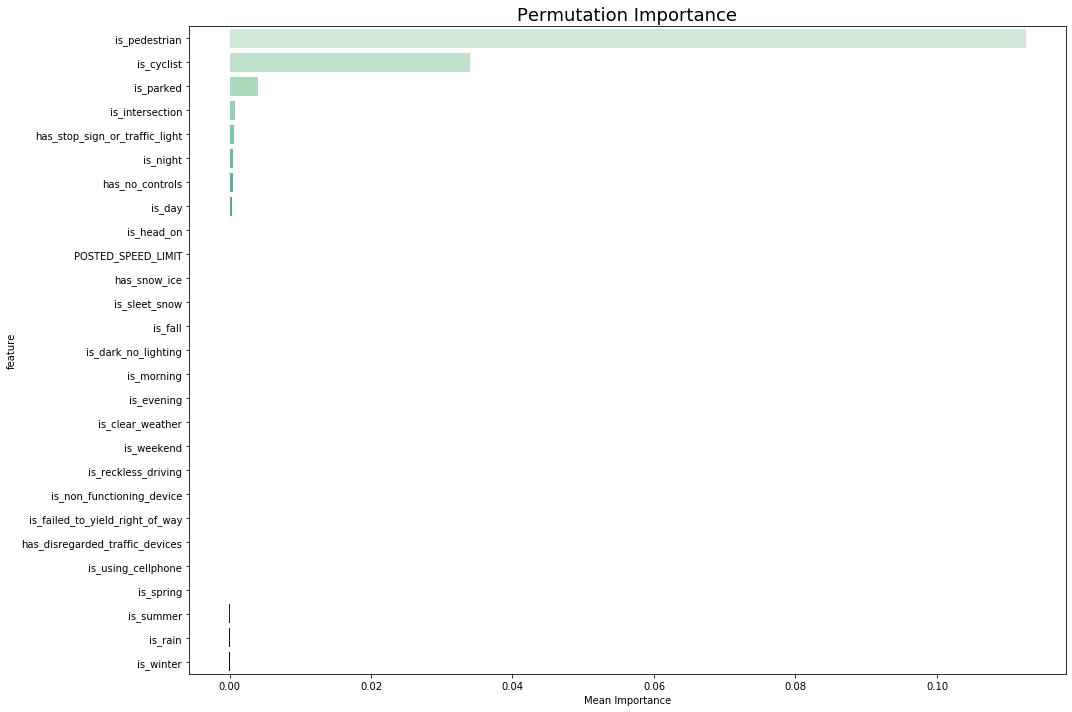

In [17]:
ensemble_utils.calculate_and_plot_permutation_importance(rf, X_over, y_over, 20, 3, (15,10), 16, X_train.columns)